In [152]:
# Compare o resultado obtido no item anterior com uma regressão linear.
# Justifique a diferença nos resultados obtidos pelos dois.

In [163]:
import numpy as np
import pandas as pd
import missingno as msno

from sklearn import linear_model

from sklearn.preprocessing import MinMaxScaler

In [164]:
data = pd.read_csv("../data/AirQualityUCI.csv", delimiter=";", decimal=",")

In [165]:
# Limpeza de dados
data = data.replace("-200,0", np.nan)
data = data.replace("-200", np.nan)
data = data.replace(-200, np.nan)
data = data.replace("NaN", np.nan)

# Remover coluna MNHC(GT) porque possui muitos dados em branco
data = data.drop(["NMHC(GT)"], axis=1)

# Remover as 2 ultimas colunas, não possuem dados
data = data.drop(data.columns[[14, 15]], axis=1)

# Drop todos os registros que possuem Nan
data = data.dropna()

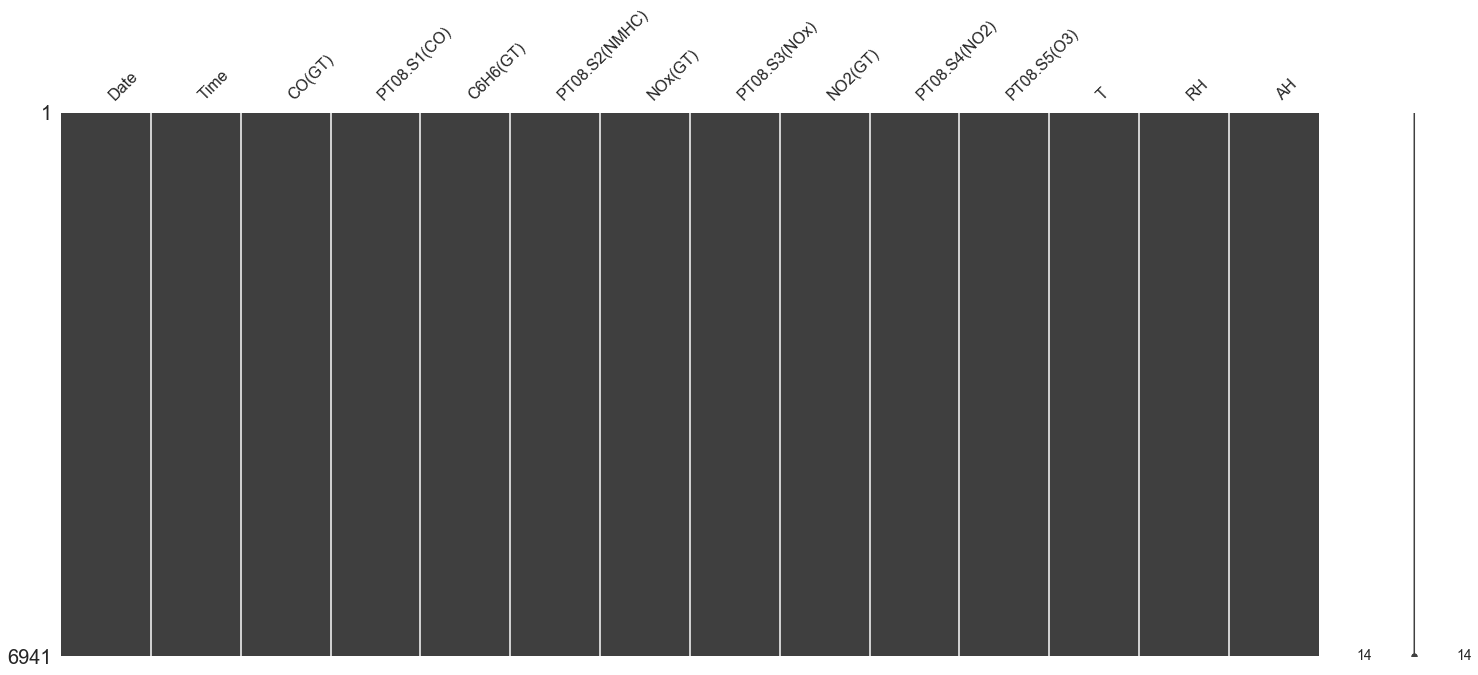

In [166]:
# Visualizar dados limpos
msno.matrix(data)

In [167]:
data.keys()

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH'],
      dtype='object')

In [168]:
interestData = data.drop(["Date", "Time"], axis=1)

In [169]:
interestData.corr()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
CO(GT),1.000000,0.877014,0.930008,0.914310,0.786456,-0.701038,0.673840,0.630834,0.853480,0.018334,0.064753,0.059346
PT08.S1(CO),0.877014,1.000000,0.877430,0.886068,0.707705,-0.762895,0.628263,0.675910,0.897166,0.028277,0.169234,0.149752
C6H6(GT),0.930008,0.877430,1.000000,0.982705,0.718344,-0.725722,0.603241,0.761805,0.861154,0.189003,-0.021592,0.187072
PT08.S2(NMHC),0.914310,0.886068,0.982705,1.000000,0.705359,-0.781630,0.633310,0.774288,0.876777,0.228333,-0.046084,0.205590
NOx(GT),0.786456,0.707705,0.718344,0.705359,1.000000,-0.662166,0.757029,0.233793,0.788550,-0.275998,0.232255,-0.144186
PT08.S3(NOx),-0.701038,-0.762895,-0.725722,-0.781630,-0.662166,1.000000,-0.641377,-0.511223,-0.793364,-0.099495,-0.116479,-0.223381
NO2(GT),0.673840,0.628263,0.603241,0.633310,0.757029,-0.641377,1.000000,0.142612,0.702524,-0.214325,-0.075333,-0.349646
PT08.S4(NO2),0.630834,0.675910,0.761805,0.774288,0.233793,-0.511223,0.142612,1.000000,0.574242,0.566586,-0.009160,0.646390
PT08.S5(O3),0.853480,0.897166,0.861154,0.876777,0.788550,-0.793364,0.702524,0.574242,1.000000,-0.046146,0.164821,0.075807
T,0.018334,0.028277,0.189003,0.228333,-0.275998,-0.099495,-0.214325,0.566586,-0.046146,1.000000,-0.563909,0.660638


In [170]:
# Remover colunas que possuem não possuem forte corelação com o CO2
interestData = interestData.drop(["PT08.S3(NOx)", "T", "RH"], axis=1)

In [171]:
X_interestData = interestData.drop(["CO(GT)"], axis=1)
y_interestData = interestData["CO(GT)"]

training_scores_X, training_scores_Y = X_interestData[:-1], y_interestData[:-1]

linear = linear_model.LinearRegression()

linear.fit(training_scores_X, training_scores_encoded)
linear.score(training_scores_X, training_scores_encoded)


0.9084584811281925

In [172]:
linear.predict(training_scores_X[-1:])

array([18.373457])

In [151]:
# Valor esperado era 2.2 e o valor recebido foi 18.37.